<a href="https://colab.research.google.com/github/ikazreal21/machinelearning_sklearn_pytorch/blob/master/stockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/30
46/46 [==============================] - 9s 64ms/step - loss: 0.0303
Epoch 2/30
46/46 [==============================] - 3s 64ms/step - loss: 0.0051
Epoch 3/30
46/46 [==============================] - 3s 63ms/step - loss: 0.0050
Epoch 4/30
46/46 [==============================] - 3s 64ms/step - loss: 0.0037
Epoch 5/30
46/46 [==============================] - 3s 64ms/step - loss: 0.0034
Epoch 6/30
46/46 [==============================] - 3s 63ms/step - loss: 0.0033
Epoch 7/30
46/46 [==============================] - 3s 63ms/step - loss: 0.0032
Epoch 8/30
46/46 [==============================] - 3s 63ms/step - loss: 0.0032
Epoch 9/30
46/46 [==============================] - 3s 63ms/step - loss: 0.0031
Epoch 10/30
46/46 [==============================] - 3s 63ms/step - loss: 0.0028
Epoch 11/30
46/46 [==============================] - 3s 63ms/step - loss: 0.0025
Epoch 12/30
46/46 [==============================] - 3s 63ms/step - loss: 0.0029
Epoch 13/30
46/46 [==================

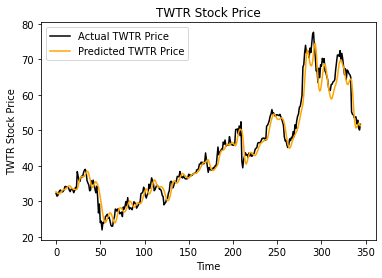

In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdweb
import datetime as dtm

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Data
# company = 'GOOG'
# company = 'GME'   
company = 'TWTR'
# company = 'AMZN'
# company = 'TSLA'


start_date = dtm.datetime(2014, 1, 1)
end_date = dtm.datetime(2020, 1, 1)

data = pdweb.DataReader(company, 'yahoo', start_date, end_date)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

predicDays = 65
# predicDays = 10

X_train = []
y_train = []

for x in range(predicDays, len(scaled_data)):
    X_train.append(scaled_data[x-predicDays:x, 0])
    y_train.append(scaled_data[x, 0])



X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# Model
model = Sequential()


model.add(LSTM(units=60, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=30, batch_size=32)


# Test
test_start = dtm.datetime(2020,1,1)
test_end = dtm .datetime.now()

test_data = pdweb.DataReader(company, 'yahoo', test_start, test_end)
accPrices = test_data['Close'].values


total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset)- len(test_data) - predicDays:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)





# Predictions

X_test = []
for x in range(predicDays, len(model_inputs)):
    X_test.append(model_inputs[x-predicDays:x, 0])


X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)



plt.plot(accPrices, color="black", label=f"Actual {company} Price")
plt.plot(predicted_price, color="orange", label=f"Predicted {company} Price")
plt.title(f"{company} Stock Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Stock Price")
plt.legend()
plt.show()


